In [20]:
import yfinance as yf
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.tree import DecisionTreeClassifier


COMPANY_TICKERS = {
    "3i": "III",
    "Admiral Group": "ADM",
    "Airtel Africa": "AAF",
    "Alliance Witan": "ALW",
    "Anglo American plc": "AAL",
    "Antofagasta plc": "ANTO",
    "Ashtead Group": "AHT",
    "Associated British Foods": "ABF",
    "AstraZeneca": "AZN",
    "Auto Trader Group": "AUTO",
    "Aviva": "AV",
    "Babcock International": "BAB",
    "BAE Systems": "BA",
    "Barclays": "BARC",
    "Barratt Redrow": "BTRW",
    "Beazley": "BEZ",
    "Berkeley Group Holdings": "BKG",
    "BP": "BP",
    "British American Tobacco": "BATS",
    "BT Group": "BT-A",
    "Bunzl": "BNZL",
    "Burberry Group": "BRBY",
    "Centrica": "CNA",
    "Coca-Cola Europacific Partners": "CCEP",
    "Coca-Cola HBC": "CCH",
    "Compass Group": "CPG",
    "Convatec": "CTEC",
    "Croda International": "CRDA",
    "DCC plc": "DCC",
    "Diageo": "DGE",
    "Diploma": "DPLM",
    "Endeavour Mining": "EDV",
    "Entain": "ENT",
    "EasyJet": "EZJ",
    "Experian": "EXPN",
    "F & C Investment Trust": "FCIT",
    "Fresnillo plc": "FRES",
    "Games Workshop": "GAW",
    "Glencore": "GLEN",
    "GSK plc": "GSK",
    "Haleon": "HLN",
    "Halma plc": "HLMA",
    "Hikma Pharmaceuticals": "HIK",
    "Hiscox": "HSX",
    "Howdens Joinery": "HWDN",
    "HSBC": "HSBA",
    "ICG": "ICG",
    "IHG Hotels & Resorts": "IHG",
    "IMI": "IMI",
    "Imperial Brands": "IMB",
    "Informa": "INF",
    "International Airlines Group": "IAG",
    "Intertek": "ITRK",
    "JD Sports": "JD",
    "Kingfisher plc": "KGF",
    "Land Securities": "LAND",
    "Legal & General": "LGEN",
    "Lloyds Banking Group": "LLOY",
    "LondonMetric Property": "LMP",
    "London Stock Exchange Group": "LSEG",
    "M&G": "MNG",
    "Marks & Spencer": "MKS",
    "Melrose Industries": "MRO",
    "Metlen Energy & Metals": "MTLN",
    "Mondi": "MNDI",
    "National Grid plc": "NG",
    "NatWest Group": "NWG",
    "Next plc": "NXT",
    "Pearson plc": "PSON",
    "Pershing Square Holdings": "PSH",
    "Persimmon": "PSN",
    "Phoenix Group": "PHNX",
    "Polar Capital Technology Trust": "PCT",
    "Prudential plc": "PRU",
    "Reckitt": "RKT",
    "RELX": "REL",
    "Rentokil Initial": "RTO",
    "Rightmove": "RMV",
    "Rio Tinto": "RIO",
    "Rolls-Royce Holdings": "RR",
    "Sage Group": "SGE",
    "Sainsbury's": "SBRY",
    "Schroders": "SDR",
    "Scottish Mortgage Investment Trust": "SMT",
    "Segro": "SGRO",
    "Severn Trent": "SVT",
    "Shell plc": "SHEL",
    "Smiths Group": "SMIN",
    "Smith & Nephew": "SN",
    "Spirax Group": "SPX",
    "SSE plc": "SSE",
    "Standard Chartered": "STAN",
    "St. James's Place": "STJ",
    "Tesco": "TSCO",
    "Unilever": "ULVR",
    "United Utilities": "UU",
    "Vodafone Group": "VOD",
    "Weir Group": "WEIR",
    "Whitbread": "WTB",
    "WPP": "WPP",
}

tickers_list = [ticker + ".L" for ticker in COMPANY_TICKERS.values()]

end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365*10)

print(f"Скачивание данных для {len(tickers_list)} компаний с {start_date.date()} по {end_date.date()}...")


data = yf.download(tickers_list, start=start_date, end=end_date, group_by='ticker', auto_adjust=False)

df_tidy = data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index()

ticker_to_name = {v + ".L": k for k, v in COMPANY_TICKERS.items()}
df_tidy['Company'] = df_tidy['Ticker'].map(ticker_to_name)


print(f"Размер df_tidy: {df_tidy.shape}")


Скачивание данных для 100 компаний с 2015-12-04 по 2025-12-01...


[*********************100%***********************]  100 of 100 completed
/tmp/ipykernel_944/1420179749.py:118: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_tidy = data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index()


Размер df_tidy: (244472, 9)


In [11]:
df_tidy

Price,Date,Ticker,Open,High,Low,Close,Adj Close,Volume,Company
0,2005-12-06,AAL.L,1954.955933,1989.291016,1943.153198,1979.634277,1964.876343,0.0,Anglo American plc
1,2005-12-06,ABF.L,824.500000,830.500000,819.000000,825.000000,821.783203,2043136.0,Associated British Foods
2,2005-12-06,ADM.L,450.000000,453.000000,445.750000,449.250000,443.993408,507481.0,Admiral Group
3,2005-12-06,AHT.L,154.736603,156.276093,154.505997,154.736603,154.167725,0.0,Ashtead Group
4,2005-12-06,ALW.L,325.899994,329.000000,325.100006,329.000000,327.487610,607430.0,Alliance Witan
...,...,...,...,...,...,...,...,...,...
463623,2025-12-01,UU.L,1235.000000,1237.000000,1228.500000,1233.500000,1233.500000,926673.0,United Utilities
463624,2025-12-01,VOD.L,94.120003,94.320000,92.360001,92.360001,92.360001,67908614.0,Vodafone Group
463625,2025-12-01,WEIR.L,2780.000000,2792.000000,2740.000000,2776.000000,2776.000000,353345.0,Weir Group
463626,2025-12-01,WPP.L,302.600006,303.950012,292.299988,298.700012,298.700012,6247665.0,WPP


/tmp/ipykernel_944/2522390858.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_features = df.groupby('Ticker', group_keys=False).apply(calculate_features)


Строк для анализа: 10337


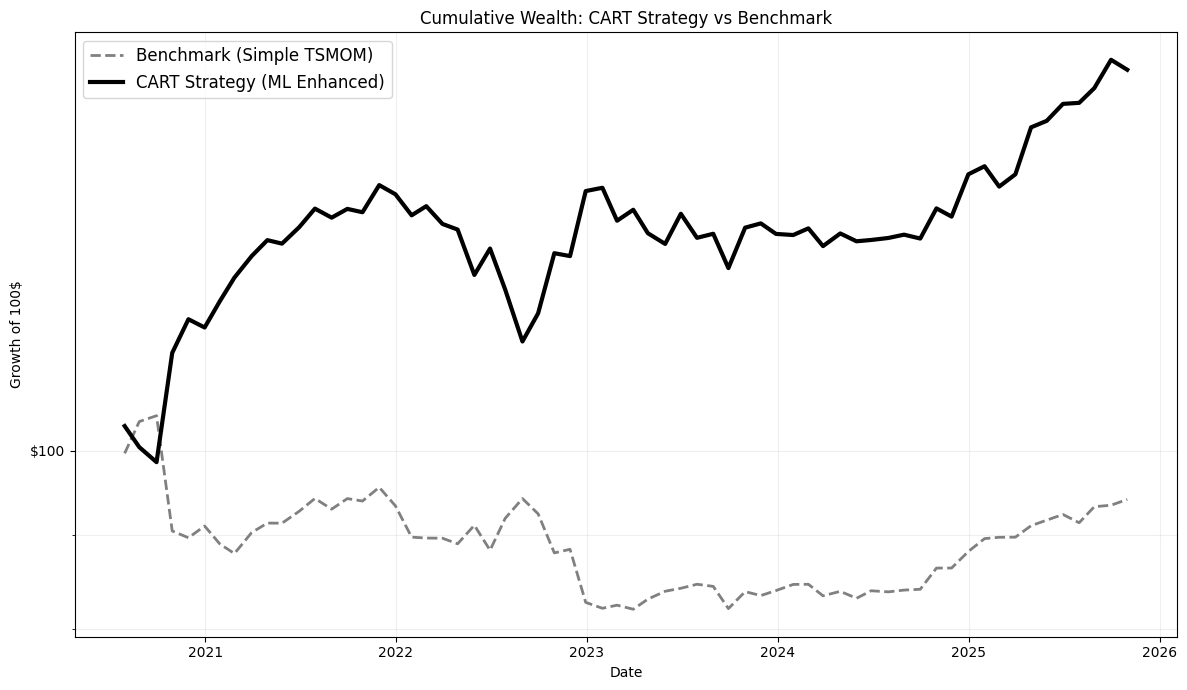


Результаты инвестирования $100:
Benchmark (Simple TSMOM): $94.07
CART Strategy:            $161.15


In [21]:
df = df_tidy.sort_values(['Ticker', 'Date']).copy()

def calculate_features(group):
    group['ret_daily'] = group['Adj Close'].pct_change()
    group['ret_next_month'] = group['Adj Close'].shift(-21) / group['Adj Close'] - 1
    group['target_class'] = (group['ret_next_month'] > 0).astype(int)

    group['feat_MOM12'] = group['Adj Close'].shift(21) / group['Adj Close'].shift(252) - 1
    group['feat_MOM1'] = group['Adj Close'] / group['Adj Close'].shift(21) - 1
    group['feat_VOL'] = group['ret_daily'].rolling(window=252).std() * np.sqrt(252) # волатильность

    return group

df_features = df.groupby('Ticker', group_keys=False).apply(calculate_features)

df_model = df_features.dropna().copy()

df_model['Month'] = df_model['Date'].dt.to_period('M')
monthly_data = df_model.groupby(['Ticker', 'Month']).last().reset_index()

print(f"Строк для анализа: {len(monthly_data)}")

features = ['feat_MOM12', 'feat_MOM1', 'feat_VOL']
target = 'target_class'

dates = monthly_data['Date'].sort_values().unique()

start_idx = int(len(dates) * 0.4)

predictions = []

for i in range(start_idx, len(dates) - 1): # по сути, расширяющееся окно.
    curr_date = dates[i]
    next_date = dates[i+1]

    train_mask = monthly_data['Date'] <= curr_date
    test_mask = monthly_data['Date'] == next_date

    X_train = monthly_data.loc[train_mask, features]
    y_train = monthly_data.loc[train_mask, target]

    X_test = monthly_data.loc[test_mask, features]

    if len(X_test) == 0: continue

    clf = DecisionTreeClassifier(
        max_depth=4,
        min_samples_leaf=30,
        criterion='gini',
        random_state=42
    )

    clf.fit(X_train, y_train)

    probs = clf.predict_proba(X_test)[:, 1]

    current_res = monthly_data.loc[test_mask, ['Date', 'Ticker', 'ret_next_month', 'feat_MOM12']].copy()
    current_res['prob_up'] = probs
    predictions.append(current_res)

results_df = pd.concat(predictions)

results_df['pos_bench'] = np.sign(results_df['feat_MOM12'])
results_df['ret_bench'] = results_df['pos_bench'] * results_df['ret_next_month']

results_df['pos_cart'] = np.where(results_df['prob_up'] >= 0.5, 1, -1)
results_df['ret_cart'] = results_df['pos_cart'] * results_df['ret_next_month']

portfolio_returns = results_df.groupby('Date')[['ret_bench', 'ret_cart']].mean()

cumulative_wealth = (1 + portfolio_returns).cumprod() * 100

plt.figure(figsize=(12, 7))

plt.plot(cumulative_wealth.index, cumulative_wealth['ret_bench'],
         label='Benchmark (Simple TSMOM)', color='gray', linewidth=2, linestyle='--')

plt.plot(cumulative_wealth.index, cumulative_wealth['ret_cart'],
         label='CART Strategy (ML Enhanced)', color='black', linewidth=3)

plt.yscale('log')
plt.title('Cumulative Wealth: CART Strategy vs Benchmark')
plt.ylabel('Growth of 100$')
plt.xlabel('Date')

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.gca().yaxis.set_minor_formatter(mticker.NullFormatter())

plt.legend(fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()

plt.show()

final_wealth_cart = cumulative_wealth['ret_cart'].iloc[-1]
final_wealth_bench = cumulative_wealth['ret_bench'].iloc[-1]

print(f"\nРезультаты инвестирования $100:")
print(f"Benchmark (Simple TSMOM): ${final_wealth_bench:.2f}")
int(f"CART Strategy:            ${final_wealth_cart:.2f}")

In [26]:
def calculate_metrics(returns_series, benchmark_series=None):
    avg_ret = returns_series.mean()

    ret_max = returns_series.max()
    ret_min = returns_series.min()

    total_ret = (1 + returns_series).prod()
    n_years = len(returns_series) / 12
    ann_ret = (total_ret) ** (1 / n_years) - 1

    ann_vol = returns_series.std() * np.sqrt(12)
    sharpe = ann_ret / ann_vol if ann_vol != 0 else 0

    skew = returns_series.skew()
    kurt = returns_series.kurt()

    cum_wealth = (1 + returns_series).cumprod()
    running_max = cum_wealth.cummax()
    drawdown = (cum_wealth - running_max) / running_max
    mdd = drawdown.min()

    info_ratio = np.nan
    if benchmark_series is not None:
        excess_ret = returns_series - benchmark_series
        tracking_error = excess_ret.std() * np.sqrt(12)
        ann_excess_ret = (1 + excess_ret.mean())**12 - 1
        info_ratio = ann_excess_ret / tracking_error if tracking_error != 0 else 0

    return {
        'Avg. Return': f"{avg_ret*100:.2f}%",
        'Return Max': f"{ret_max*100:.2f}%",
        'Return Min': f"{ret_min*100:.2f}%",
        'Ann. Return': f"{ann_ret*100:.2f}%",
        'Ann. Vol.': f"{ann_vol*100:.2f}%",
        'Sharpe Ratio': f"{sharpe:.2f}",
        'Info. Ratio': f"{info_ratio:.2f}" if benchmark_series is not None else "-",
        'Skewness': f"{skew:.2f}",
        'Kurtosis': f"{kurt:.2f}",
        'MDD': f"{mdd*100:.2f}%"
    }

metrics_bench = calculate_metrics(portfolio_returns['ret_bench'])
metrics_cart = calculate_metrics(portfolio_returns['ret_cart'], portfolio_returns['ret_bench'])

performance_table = pd.DataFrame({
    'Benchmark (TSMOM)': metrics_bench,
    'CART Strategy': metrics_cart
})

order = [
    'Avg. Return', 'Return Max', 'Return Min',
    'Ann. Return', 'Ann. Vol.', 'Sharpe Ratio',
    'Info. Ratio', 'Kurtosis', 'Skewness', 'MDD'
]
performance_table = performance_table.reindex(order)

print("\n============ Performance Summary ==========")
print(performance_table)


============ Performance Summary ==========
             Benchmark (TSMOM) CART Strategy
Avg. Return             -0.06%         0.81%
Return Max               4.08%        14.67%
Return Min             -13.44%        -6.29%
Ann. Return             -1.14%         9.36%
Ann. Vol.                8.71%        12.04%
Sharpe Ratio             -0.13          0.78
Info. Ratio                  -          0.60
Kurtosis                 12.38          3.15
Skewness                 -2.70          1.02
MDD                    -21.53%       -17.79%
